# Minitorch workshop

#### Warning
This workshop does not require any prior knowledge of pytorch to follow it. It's actualy a great introduction to Pytorch and Autograds.

However it does require some knowledge of machine learning and a good base in **python**.

### Summary

* Tensors
* Reminders about ML and numeric differentiation
* Automatic Differentiation
* Pytorch architecture
* Base Layers
* Optimizer
* Loss functions
* Make a model !

#### PreInstall

It is advised to setup a virtual env before using a jupyter notebook. To do so use this command in your terminal:
```bash
python3 -m venv .venv
```
After this, select it as your VSCode Env using `Ctrl+P` then searching "python env" and creating a new env and selecting the path to the bin in the newly created `.venv` folder.

#### Dependencies


In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install torch
!{sys.executable} -m pip install torchvision

import torch as t
import numpy as np
import torchvision as tv
import tests

### Tensors

Tensors are a form of list of information that is kept in one dimension in memory. A tensors may have different types, shapes and strides.

#### Types

The type of tensor impacts the capacity of storage of each element but also its performance when computing operations.
Its usually a tradeoff that people forget to think about. In fact, there are operations that can calculate 4 `float32` (32 bits each) at the same time when we can only compute 2 `float64` (64 bits each) at the same time.

So the type is very important even if it doesn't always look like it.

#### Shape

A tensor's data is kept in one dimension but the shape has an importance in representing it in another dimension.
The shape is used to perform operations without having to keep a multidimensionnal list.
Its a smart way of making the memory easily use cache efficiently.

#### Strides

A stride is like a step in a dimension. The strides are each step in the 1 dimensional list that is a tensor.

For example:
```python
import torch
a = torch.tensor([[3, 4], [2, 5]])
a.strides -> (2, 1)
```
It's great to easily manipulate the content on an array without really even touching it.

#### In Pytorch

To create a tensor, just use the tensor method
```python
import torch
a = torch.tensor([4, 2, 4, 5])
```

A type can be precised:
```python
import torch
b = torch.tensor([4, 2, 4, 5], dtype=torch.float32)
```

A list of methods to create tensors exists in [pytorch docs](https://pytorch.org/docs/stable/tensors.html).

### Reminder about ML and numeric differentiation

#### Basics

The goal of neural networks is to find a solution to a problem as subequations working together in a bigger equation.\
For example, a linear neural network is an acyclic graph of linear transformations.\
As such, each linear transformation is easily differentiable. By making use of the chain rule we can therefore create an auto differentiation tool.

#### Reminder about Numeric differentiation

Differentiation is the idea of finding the movement of a funtion by calculating said movement at a minuscule step. Therefore the formula for calculating it is:

$ f'(x) = lim_{h->0}\frac{f(x + h) - f(x)}{h}$

Where h is the very small substep.
The absolute differentiation of some functions are already available in differentiation tables that can be found on the internet.

### Auto Differentiation

I cited the chain rule earlier but i didn't go into details about it. Basically the chain rule is the following:

*The differentiation of p(x) = f(g(x)) is:*
$p'(x) = f'(g(x)) * g'(x)$

Here's an example to show you the power of this rule:

Taking the following equation:

y = a * x + b

We can differentiate it by using the chain rule.
y = f(g(x)) where f(x) = a * x and g(x) = x + b.

Now we can differentiate f(x) on one side using the result of g(x) and differentiate g(x) then multiply these results to obtain the derivative of y.

Here the calculation is simple but this logic can be applied to more complex calculations.

This is the logic **pytorch** uses when using the ``backward`` method on a tensor.


#### My Auto Differentiation :

We will now recreate this very useful tool that is the base of neural network optimization.

In order to recreate it, we must create our tensor class that will keep track of our gradient.
We will wrap a numpy array in order to keep our data efficiently.
(If you want to go further, you can make your own library in C to handle tensors. However it might be too difficult for the purposes of this notebook).

A DAG, or Directed Acyclic Graph is the shape we go for when creating a graph of the operations to backward on using the chain rule.

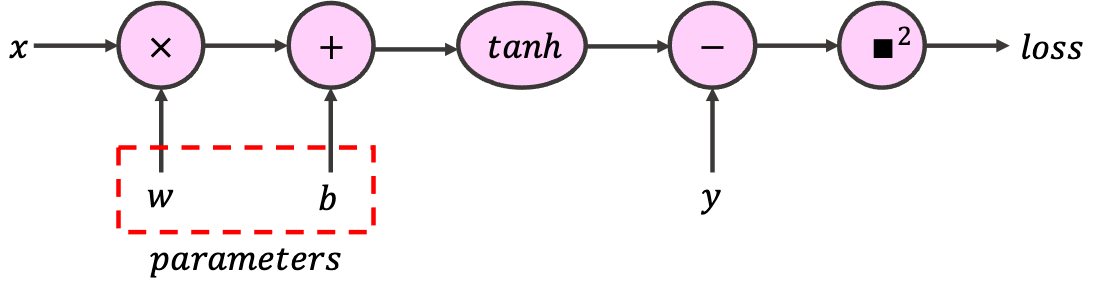

Complete the following code:

<details>
<summary>Click here for Hints</summary>

1) `MyCrossBackward` is the class that holds the tensors necessary to derive each operations. It also holds the differentiation function.

2) The backward function just calls the `MyCrossBackward` object set on the object when performing operations.

3) In python there are ways to override operations on objects for the interpreter. Here's an example:

```python
class TestObject:

    def __init__(self, data : int):
        self.data = data

    def __add__(self, other):
        return TestObject(self.data, other)

a = TestObject(3)
b = TestObject(4)
a + b # is equivalent to a.__add__(b)
```

4) __div__ might not be right, __truediv__ ;)   
5) Only operations on leaves need to keep the gradients (it's the variable), while intermediate result tensors do not need to be kept. As such, only gradients on leaves need to be stacked
6) Here's a table to help you when writing the backwards functions:

| Function | Derivative |
|----------|------------|
| $x^{n}$  | $nx^{n-1}$ |
| $ax$     | $a$        |
| $x + a$  | $1$        |
| $x/a$    | $1/a$      |
| $1/x$    | $-1/x^{2}$ |

</details>

In [ ]:
from typing import Any, Callable

""" Classes """

class MyCrossBackward:

    def __init__(self, *args, backward_function : Callable[..., None], name : str) -> None:
        
        self.__data = list(args)
        self.__bf = backward_function
        self.__name = name

    """ Private """

    def __str__(self) -> str:
        return self.__name
    
    def __call__(self, x) -> Any:
        """
            This method is called when calling the model with the () operation.
            Ex:
                bcw = MyCrossBackward(...)
                bcw(x) <- called here
        """

        return self.run(x)
    
    """ Public """
    
    def run(self, base) -> None:
        """run the backward operation

        Args:
            base (MyTensor): basically the tensor accumulating gradients

        Returns:
            None: nothing
        """
        return self.__bf(base, *self.__data)

class MyTensor:

    def __init__(self,
                 data : list | np.ndarray | int | float,
                 dtype : np.dtype = None,
                 requires_grad : bool = False,
                 crossOpBack : MyCrossBackward = None) -> None:
        # the __ prefix mark private attributes (it can't be recovered
        # outside of the class)
        
        assert (isinstance(data, (list, np.ndarray, int))), "The given data is of an invalid type"

        # code the init here (take into account the different possible input types)
        # init the following properties :
        # self.__data,
        # self.dtype,
        # self.requires_grad,
        # self.grad = None
        # self.backward_op = ...
        ...
        #end of code
        pass

    """ Properties """

    """ Here an example on how to set a getter for an attribute """
    @property
    def shape(self):
        return self.__data.shape
    """ Now make it for: strides, data and size"""

    """ Privates """

    def __str__(self) -> str:
        # display the data and info about the tensor
        ...

    def __repr__(self) -> str:
        return self.__str__()

    # as our tensor elements need to be accessible you need to make each
    # function that make your object a pylist
    # hint: __getitem__, __setitem__ 
    ...

    # the operations ? (see hints)
    # the needed operations for this one are : add, mul, pow, div. (with tensors and scalars (int, float)).
    ...

    """ Operations """

    """ Publics """

    def backward(self, base = None) -> None:
        """This function calls the backward on the Directed Acyclic graph
        formed from the operations between the tensors.

        Args:
            base (MyTensor, optional): The base tensor that accumulates grads. Defaults to None.
        """

        # in theory: a backward that accumulates gradients just starts with a base tensor of 1 (if is None)
        
        # code here
        ...
        # end of code

        if self.backward_op != None:
            self.backward_op(base)

""" derivatives """

def add_deriv(base, *tensors):
    """ the tensors we will consider are only of the same shape """
    ## This function is an example and is not perfect by any means. It works for this exercise but do not consider broadcasting and shape manipulation.
    left : MyTensor = tensors[0]
    right : MyTensor = tensors[1]

    if (left.requires_grad):
        grad = MyTensor(base.data * np.ones_like(right.data))
        if (left.backward_op == None):
            left.grad = left.grad and left.grad + grad or grad 
        left.backward(grad)
    
    if (right.requires_grad):
        grad = MyTensor(base.data * np.ones_like(left.data))
        if (right.backward_op == None):
            right.grad = right.grad and right.grad + grad or grad
        right.backward(grad)

def mul_deriv(base, *tensors):
    """ tensors[0] BxC, tensors[1] BxC """
    """ its like a matmul """
    ...
    pass

def div_deriv(base, *tensors):
    """ tensors of the same shape """
    ...
    pass

def pow_deriv(base, *args):
    """ tensor, power """
    ...
    pass

def sub_deriv(base, *tensors):
    ...
    pass

tensor_a = MyTensor([3, 4, 5, 6, 7])

Let's test your code ! (They are not easy to pass but are mandatory)

In [ ]:
tests.test_tensor_class(MyTensor)

### Pytorch Architecture

Pytorch decided to go with a component style architecture working by modules. Each module is a mathematical tranformation of a data *x* to a result *y*.
A module is a class that each Neural Network module inherits from.

This class automatically regulates the parameters and adding of sub modules in the network by controlling the __setattr__ method of python classes.

Please complete the code below

In [ ]:
from typing import Any


class Parameter:

    def __init__(self, tensor : MyTensor) -> None:
        self.tensor : MyTensor = tensor
        self.tensor.requires_grad = True
        self.__name : str = None

    @property
    def name(self):
        return self.__name
    
    @name.setter
    def name(self, x):
        self.__name = x

class MyModule:

    def __init__(self) -> None:
        
        self.__parameters : list[Parameter] = []
        self.__sub_modules : list[MyModule] = []

    def __setattr__(self, __name: str, __value: Any) -> None:
        
        if (isinstance(__value, Parameter)):
            __value.name = __name
            self.__parameters.append(__value)

        if (isinstance(__value, MyModule) and __value != self):
            self.__sub_modules.append(__value)

        self.__dict__.__setitem__(__name, __value)


    def __call__(self, x) -> Any:
        """ this function calls the forward of its child """
        return self.forward(x)
    

    def parameters(self):
        ## this function needs to return the list of all parameters
        ...

Let's test it ! (only 1 test)

In [ ]:
tests.test_my_module(MyModule, MyTensor, Parameter)

### Base Layers

In this section, we will recreate the 'Linear' and 'ReLU' layers. If you didn't know, they are the ones that are the most used because, according to the universal approximation theorem, any function can be represented by using x number of relu and linear layers.

To make it short, relu is a function equivalent to max(x, 0) or mathematicaly
$$
\mathrm{F}(x) = \begin{cases}
    0 & \text{if } x < 0 \\ % & is your "\tab"-like command (it's a tab alignment character)
    x & \text{otherwise.}
\end{cases}
$$

It is useful for a neural network to represent threshold.
And Linear layers and basically linear transformations of vector of entry to another vector of another form.
$$
    y = ax + b
$$

The problem is that when passing from one linear layer to another, as we want to have n result from m entries, the weight is often of the form nxm.
therefore:
$$
    nxm * mx1 -> nx1
$$
This transformation is known as *matrix multiplication*
We will need to code this transformation before coding the Linear layer.

#### Now, let's code

Complete the code below


In [ ]:
def matmul_deriv(base : MyTensor, *tensors):
    ...

def matmul(a : MyTensor, b : MyTensor):
    ...

class Linear(MyModule):

    def __init__(self, input_size : int, output_size : int) -> None:

        # init the MyModule class
        super().__init__()

        # code here (init 2 private parameters: weight (a), bias (b)) based on the input_size and output_size
        ...
    
    def forward(self, x : MyTensor):
        """this function may return the linear transformation of x by the layer 

        x * weight + bias

        Args:
            x (MyTensor): The tensor to transform
        """
        ...

def relu(x : MyTensor) -> MyTensor:
    """ code the relu transformation here
        Hint : relu is just a multiplication of a matrix by a mask of 0 and 1 isn't it?
        *use np.where and np.matmul()*
    """
    # code here
    ...
    # end of code

class ReLU(MyModule):

    def __init__(self) -> None:
        """ The relu class is just a transformation without any weight """
        super().__init__()
        pass

    def forward(self, x : MyTensor):
        return relu(x)
        

You know what time it is? Testing time !

In [ ]:
tests.test_linear(Linear, MyTensor, Parameter)

### Optimizer

An optimizer is a class that takes the ``parameters()`` of a network when initializing and that has 2 methods: ``zero_grad()`` and ``step()``.

``zero_grad``: sets all the gradients of the parameters of the module and sub_modules to ``None``.
``step``: Apply the gradients with the optimizer's strategy.

Different optimizers have different strategies, let's create the easiest one in this workshop: ``SGD`` or Stochastic Gradient Descent.

SGD works by optimizing a loss function (function that is at its lowest when the network perform well), by making the parameters converge to the minimum by reducing them or augmenting them depending on their measured impact through ``differentiation`` (the impact is basically the gradients).

So basically, with $\displaystyle \frac{\partial L}{\partial W}$ being the partial derivative of the Loss *L* to *W* being the weights, the W is updated by:
$$
    W = W - lr * \displaystyle \frac{\partial L}{\partial W}
$$
Where $ lr $ is the learning rate. You can see it has the speed of convergence. It is like speed in a video game: if you are fast you travel large distances quickly but its hard to go on a precise position. It's the same idea here. It's often seen as a tradeoff between training speed and precision.

#### Let's code it

Let's stop with the theory, let's apply it!

Complete the code below:

In [ ]:
class SGD:

    def __init__(self, parameters : list[Parameter], lr : float = 0.1e-3) -> None:
        self.lr = lr
        self.params = parameters

    def zero_grad(self):
        ...

    def step(self):
        ...
    

TESSSSTING !

In [ ]:
tests.test_sgd(SGD, MyTensor, Parameter)

### Loss function

In Pytorch, a loss function is basically a Python object that overrides the ``__call__`` method.

We will now recreate the most known loss function that works for 90% of supervised ML problems : MSELoss aka Mean Squared Error.
As its name implies, it's the mean of the error between a target value *ŷ* and the output of the network *y*.
Mathematically:
$$
    \frac{1}{n}\sum_{i=0}^{n}(ŷ_{i} - y_{i})^2
$$

Maybe you understood it but you may not be able to make this one without the ``sum`` function and its backward. I'll drop this one for you ;)

#### Ok, know let's code it


In [ ]:
from typing import Tuple

def sum_deriv(base_tensor : MyTensor, *tensors):
    from_tensor : MyTensor = tensors[0]
    axis : Tuple[int] = tensors[1]

    if (from_tensor.requires_grad):
        k = base_tensor.data.copy()
        if (axis is not None):
            o = np.array(from_tensor.shape)
            o[list(axis)] = np.ones(len(axis), dtype=int)
            k = k.reshape(tuple(o))
        k = np.broadcast_to(k, from_tensor.shape)
        if (from_tensor.backward_op == None):
            from_tensor.grad += MyTensor(k)
        else:
            from_tensor.grad = MyTensor(k)
        from_tensor.backward(from_tensor.grad, forced=True)

def sum(x : MyTensor, axis : Tuple[int]):
    return MyTensor(np.sum(x.data, axis=axis), requires_grad=x.requires_grad,
                    crossOpBack=MyCrossBackward(x, backward_function=sum_deriv, name="SumBackward") if x.requires_grad else None)

class MSELoss:

    def __init__(self) -> None:
        pass

    def __call__(self, y, y_target) -> Any:
        # code here
        ...

Testing again :/ (last time! i promise)

In [ ]:
tests.test_mseloss(MSELoss, MyTensor)

### Make a Model !

Ok, with what you have, you can now create a basic model.

Let's see your creativity at work !

In [ ]:
class SuperModel(MyModule):

    ...

m = SuperModel()

loss_fct = MSELoss()

optimizer = SGD(m.parameters())

# use the one you would like
dataset = ...

epochs = 10
for i in range(epochs):

    for batch, target in dataset:

        optimizer.zero_grad()

        y = m(batch)
        loss = loss_fct(y, target)

        # calculate the gradients
        loss.backward()

        # apply them
        optimizer.step()


### Conclusion

Well done, you have made a mini version of torch. With this concept in mind you may be able to see the possibility to extend this work to a library of your!